## How do you model similarity between documents?

In [1]:
doc1 = "Still no reply about my bills."
doc2 = "Still no reply about my complaint."
doc3 = "The waiter was rude."

## Bag of words model

In [2]:
set1 = set(doc1.split())
set2 = set(doc2.split())
set3 = set(doc3.split())

# measure similarity based on the how big the intersection is of two documents

similar_intersection = set1.intersection(set2)
print(similar_intersection, len(similar_intersection))
dissimilar_intersection = set1.intersection(set3)
print(dissimilar_intersection, len(dissimilar_intersection))

{'about', 'Still', 'reply', 'no', 'my'} 5
set() 0


What if we would like to classify issues related to email customer service?:

We need to vectorise these features so we can better reason about them.

### One hot vectoriser

In [3]:
# build vocabulary
vocabulary = {}

def add_words_to_vocabulary(document, vocabulary):
    for word in document.split():
        vocabulary[word] = 1
    return vocabulary

vocabulary = add_words_to_vocabulary(doc1, vocabulary)
print("Key words after first document \n",vocabulary.keys())
vocabulary = add_words_to_vocabulary(doc2, vocabulary)
print("Key words after second document \n",vocabulary.keys())
vocabulary = add_words_to_vocabulary(doc3, vocabulary)
print("Key words after third document \n",vocabulary.keys())

Key words after first document 
 dict_keys(['Still', 'about', 'reply', 'no', 'my', 'bills.'])
Key words after second document 
 dict_keys(['Still', 'about', 'reply', 'no', 'complaint.', 'my', 'bills.'])
Key words after third document 
 dict_keys(['Still', 'about', 'reply', 'no', 'was', 'complaint.', 'waiter', 'The', 'rude.', 'my', 'bills.'])


In [93]:
vocabulary2index = list(vocabulary.keys())
def vectorise(document, vocabulary2index):
    # initialise vector of 0 of the length of the vocabulary
    vector = [0]*(len(vocabulary2index))
    for word in document.split():
        vector[vocabulary2index.index(word)] = 1
    return vector

docs = [doc1, doc2, doc3]
vectors = [vectorise(doc, vocabulary2index) for doc in docs]

print("Index to word mapping:")
print(list(zip(vocabulary2index, range(len(vocabulary2index)))))
print("Document vector representations:")
_ = [print(doc, "\n", vectors[i]) for i, doc in enumerate(docs)]

Index to word mapping:
[('Still', 0), ('about', 1), ('reply', 2), ('no', 3), ('was', 4), ('complaint.', 5), ('waiter', 6), ('The', 7), ('rude.', 8), ('my', 9), ('bills.', 10)]
Document vector representations:
Still no reply about my bills. 
 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
Still no reply about my complaint. 
 [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0]
The waiter was rude. 
 [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]


[[0, 1, 1], [1, 1, 0]]


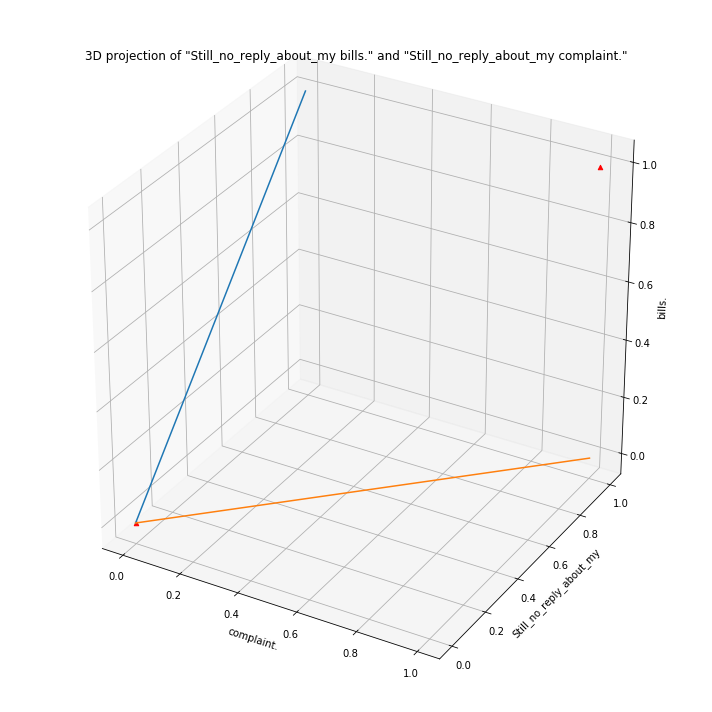

In [89]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

simplified_doc1 = "Still_no_reply_about_my bills."
simplified_doc2 = "Still_no_reply_about_my complaint."
simplified_docs = [simplified_doc1, simplified_doc2]

simple_vocab = {}

for doc in simplified_docs:
    simple_vocab = add_words_to_vocabulary(doc, simple_vocab)
    
simple_vocab2index = list(simple_vocab.keys())

simple_vectors = [vectorise(doc, simple_vocab2index) for doc in simplified_docs]


#3D plot
def plot_point(vector, colour, marker):
    x = vector[0]
    y = vector[1]
    z = vector[2]
    ax.scatter(x, y, z, c=colour, marker=marker)
print(simple_vectors)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
VecStart_x = [0]*2
VecStart_y = [0]*2
VecStart_z = [0]*2
VecEnd_x = [0,1]
VecEnd_y = [1,1]
VecEnd_z  =[1,0]
for i in range(2):
    ax.plot([VecStart_x[i], VecEnd_x[i]], [VecStart_y[i],VecEnd_y[i]],zs=[VecStart_z[i],VecEnd_z[i]])

plot_point([0,0,0], colour="r", marker="^")
plot_point([1,1,1], colour="r", marker="^")
ax.set_xlabel(simple_vocab2index[0])
ax.set_ylabel(simple_vocab2index[1])
ax.set_zlabel(simple_vocab2index[2])
plt.title('3D projection of "Still_no_reply_about_my bills." and "Still_no_reply_about_my complaint."')
plt.tight_layout()
plt.show()

As you can see due to the vocabulary having 3 elements we represent the documents with 3d vectors as the vocabulary increases the dimensionality increaese as well.


What documents do the red triangles represent?

## So how can we represent the similarity between documents?

We could look at the angles between the vectors of these points.

![By Baelde - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=18685947 ](https://upload.wikimedia.org/wikipedia/commons/1/11/Academ_Base_of_trigonometry.svg)

In [68]:
from IPython.core.display import display, HTML
HTML('<iframe src=https://www.geogebra.org/m/d6hGsXdT width=700 height=350></iframe>')

Cosine similarities are difficult to interpret with high dimensional vectors. We would like a more transparent model where it is clear which words contribute to our decisions.

### Thinking about conditional probabilities

In [95]:
print(doc1)
print(doc2)
print(doc3)
print(vectors[0])
print(vectors[1])
print(vectors[2])


Still no reply about my bills.
Still no reply about my complaint.
The waiter was rude.
[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]


probability(class=bill | document="Still no reply about my bills.") = probability(class=bill | vector=[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

probability(class=waiter | document="The waiter was rude.") = probability(class=bill | vector=[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

